In [1]:
# importing libraries
from urllib.request import urlopen as url #importing urllib for url request
from bs4 import BeautifulSoup
import requests
import urllib.request
from urllib.request import urlopen
import re
import time

import pandas as pd #Importing the PANDAS python library
import numpy as np #importing Numpy
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline



#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #initiating VADER instance

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/randallgeszvain/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
CUISINES = ['artisan-ramen-milwaukee','red-light-ramen-milwaukee-5','kawa-ramen-and-sushi-milwaukee-2','easy-tyger-milwaukee','tangled-noodles-milwaukee','red-light-ramen-milwaukee-3','chard-milwaukee-2','fusion-poke-milwaukee-2','kanpai-milwaukee-2','momo-mee-milwaukee']

biz=[]
aggregateRating=[]
priceRange=[]
streetAddress=[]
addressLocality=[]
addressRegion=[]
postalCode=[]
yelp=[]  

for name in CUISINES:
  
  for cp in np.arange(0,1):
  
    url = "http://www.yelp.com/biz/" + name + "?start=" + str(cp*20)
    html = urlopen(url)
    soup = BeautifulSoup(html, 'html.parser')
    metas_biz = soup.findAll("meta",{"itemprop":"name"})
    metas_aggregateRating = soup.find_all("meta",{"itemprop":"ratingValue"})
    metas_priceRange = soup.find_all("meta",{"itemprop":"priceRange"})
    
    biz.append(name)  
    aggregateRating.extend(i for i in [meta_aggregateRating.attrs['content'] for meta_aggregateRating in metas_aggregateRating[0:1] if 'itemprop' in meta_aggregateRating.attrs])
    priceRange.extend(i for i in [meta_priceRange.attrs['content'] for meta_priceRange in metas_priceRange if 'itemprop' in meta_priceRange.attrs])
    streetAddress.extend(i.text for i in soup.findAll("span",{"itemprop":"streetAddress"}))
    addressLocality.extend(i.text for i in soup.findAll("span",{"itemprop":"addressLocality"}))
    addressRegion.extend(i.text for i in soup.findAll("span",{"itemprop":"addressRegion"}))
    postalCode.extend(i.text for i in soup.findAll("span",{"itemprop":"postalCode"}))
    time.sleep(8)


biz = pd.DataFrame(biz)
aggregateRating = pd.DataFrame(aggregateRating)
priceRange = pd.DataFrame(priceRange)
streetAddress = pd.DataFrame(streetAddress)
addressLocality = pd.DataFrame(addressLocality)
addressRegion = pd.DataFrame(addressRegion)
postalCode = pd.DataFrame(postalCode)

yelp = pd.concat([biz, aggregateRating,  priceRange,  streetAddress, addressLocality, addressRegion, postalCode], axis=1, ignore_index=True)
yelp.columns = ['biz','aggregateRating','priceRange', 'streetAddress', 'addressLocality', 'addressRegion', 'postalCode']

export = yelp.to_csv("yelp" + ".csv")

In [3]:
CUISINES = ['artisan-ramen-milwaukee','red-light-ramen-milwaukee-5','kawa-ramen-and-sushi-milwaukee-2','easy-tyger-milwaukee','tangled-noodles-milwaukee','red-light-ramen-milwaukee-3','chard-milwaukee-2','fusion-poke-milwaukee-2','kanpai-milwaukee-2','momo-mee-milwaukee']

for name in CUISINES:

  date=[]
  author=[]
  #rating=[]
  review=[]
  yelp=[]  
  
  for cp in np.arange(0,10):
  
    url = "http://www.yelp.com/biz/" + name + "?start=" + str(cp*20)
    html = urlopen(url)
    soup = BeautifulSoup(html, 'html.parser')
    metas_author = soup.findAll("meta",{"itemprop":"author"})
    #metas_ratingValue = soup.find_all("meta",{"itemprop":"ratingValue"})
    metas_date = soup.find_all("meta",{"itemprop":"datePublished"})
    
    date.extend(i for i in [meta_date.attrs['content'] for meta_date in metas_date if 'itemprop' in meta_date.attrs])  
    author.extend(i for i in [meta_author.attrs['content'] for meta_author in metas_author if 'itemprop' in meta_author.attrs])
    #rating.extend(i for i in [meta_ratingValue.attrs['content'] for meta_ratingValue in metas_ratingValue[1:21] if 'itemprop' in meta_ratingValue.attrs])
    review.extend(i.text for i in soup.findAll("p",{"itemprop":"description"}))
    time.sleep(10)


  date = pd.DataFrame(date)
  author = pd.DataFrame(author)
  #rating = pd.DataFrame(rating)
  review = pd.DataFrame(review)

  yelp = pd.concat([date, author,  review], axis=1, ignore_index=True)
  yelp.columns = ['date','author','review']

  export = yelp.to_csv(name + ".csv")

In [4]:
artisan_ramen_milwaukee = pd.read_csv('artisan-ramen-milwaukee.csv',index_col=0)
chard_milwaukee_2 = pd.read_csv('chard-milwaukee-2.csv',index_col=0)
easy_tyger_milwaukee = pd.read_csv('easy-tyger-milwaukee.csv',index_col=0)
fusion_poke_milwaukee_2 = pd.read_csv('fusion-poke-milwaukee-2.csv',index_col=0)
kanpai_milwaukee_2 = pd.read_csv('kanpai-milwaukee-2.csv',index_col=0)
kawa_ramen_and_sushi_milwaukee_2 = pd.read_csv('kawa-ramen-and-sushi-milwaukee-2.csv',index_col=0)
red_light_ramen_milwaukee_3 = pd.read_csv('red-light-ramen-milwaukee-3.csv',index_col=0)
red_light_ramen_milwaukee_5 = pd.read_csv('red-light-ramen-milwaukee-5.csv',index_col=0)
tangled_noodles_milwaukee = pd.read_csv('tangled-noodles-milwaukee.csv',index_col=0)
momo_mee_milwaukee = pd.read_csv('momo-mee-milwaukee.csv',index_col=0)

In [5]:
artisan_ramen_milwaukee['name'] = 'artisan_ramen_milwaukee'
chard_milwaukee_2['name'] = 'chard_milwaukee_2'
easy_tyger_milwaukee['name'] = 'easy_tyger_milwaukee'
fusion_poke_milwaukee_2['name'] = 'fusion_poke_milwaukee_2'
kanpai_milwaukee_2['name'] = 'kanpai_milwaukee_2'
kawa_ramen_and_sushi_milwaukee_2['name'] = 'kawa_ramen_and_sushi_milwaukee_2'
red_light_ramen_milwaukee_3['name'] = 'red_light_ramen_milwaukee_3'
red_light_ramen_milwaukee_5['name'] = 'red_light_ramen_milwaukee_5'
tangled_noodles_milwaukee['name'] = 'tangled_noodles_milwaukee'
momo_mee_milwaukee['name'] = 'momo_mee_milwaukee'

In [6]:
sentences = artisan_ramen_milwaukee.append([chard_milwaukee_2, easy_tyger_milwaukee, fusion_poke_milwaukee_2, kanpai_milwaukee_2,kawa_ramen_and_sushi_milwaukee_2, red_light_ramen_milwaukee_3, red_light_ramen_milwaukee_5, tangled_noodles_milwaukee, momo_mee_milwaukee])

In [7]:
len(sentences)

1080

In [8]:
sentences = sentences.rename(columns={"review": "text"})

In [9]:
sentences.head()

,date,author,text,name
0,2019-07-02,Lou N.,Stopped in on a whim and was quite surprised. ...,artisan_ramen_milwaukee
1,2019-06-14,Teresa B.,This is my favorite ramen in Milwaukee. I've b...,artisan_ramen_milwaukee
2,2019-05-30,Katie C.,There aren't a lot of great ramen joints in Mi...,artisan_ramen_milwaukee
3,2019-08-03,Ann S.,Had a hankering for ramen after having a delig...,artisan_ramen_milwaukee
4,2019-08-03,Kim H.,We were in town for a night and this restauran...,artisan_ramen_milwaukee


In [10]:
def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)  #Calling the polarity analyzer
    print("{:-<40} {}".format(sentence, str(snt)))

In [11]:
%time   #to calulate the time it takes the algorithm to compute a VADER score

i=0 #counter

compval1 = [ ]  #empty list to hold our computed 'compound' VADER scores


while (i<len(sentences)):

    k = analyser.polarity_scores(sentences.iloc[i]['text'])
    compval1.append(k['compound'])
    
    i = i+1
    
#converting sentiment values to numpy for easier usage

compval1 = np.array(compval1)

len(compval1)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs


1080

In [12]:
sentences['VADER score'] = compval1

In [13]:
sentences.dtypes

date            object
author          object
text            object
name            object
VADER score    float64
dtype: object

In [14]:
VADER_avg = sentences[['name','VADER score']]

In [15]:
VADER_avg = VADER_avg.groupby(['name']).mean()

In [16]:
VADER_avg = pd.DataFrame(VADER_avg)

In [17]:
VADER_avg.head()

,VADER score
name,
artisan_ramen_milwaukee,0.752508
chard_milwaukee_2,0.767241
easy_tyger_milwaukee,0.828885
fusion_poke_milwaukee_2,0.893281
kanpai_milwaukee_2,0.731384


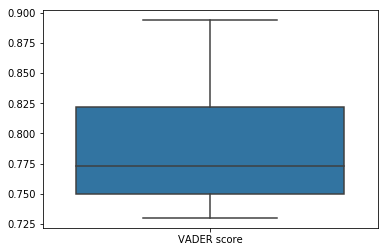

In [18]:
sns.boxplot(data=VADER_avg)

In [19]:
sentences = pd.DataFrame(sentences)

In [20]:
vader = sentences.set_index('date')

In [21]:
vader.head()

,author,text,name,VADER score
date,,,,
2019-07-02,Lou N.,Stopped in on a whim and was quite surprised. ...,artisan_ramen_milwaukee,0.8562
2019-06-14,Teresa B.,This is my favorite ramen in Milwaukee. I've b...,artisan_ramen_milwaukee,0.9986
2019-05-30,Katie C.,There aren't a lot of great ramen joints in Mi...,artisan_ramen_milwaukee,0.9766
2019-08-03,Ann S.,Had a hankering for ramen after having a delig...,artisan_ramen_milwaukee,0.5187
2019-08-03,Kim H.,We were in town for a night and this restauran...,artisan_ramen_milwaukee,0.9483


In [22]:
vader_artisan_ramen_milwaukee = vader[vader['name'].str.contains("artisan_ramen_milwaukee")]
vader_chard_milwaukee_2 = vader[vader['name'].str.contains("chard_milwaukee_2")]
vader_easy_tyger_milwaukee = vader[vader['name'].str.contains("easy_tyger_milwaukee")]
vader_fusion_poke_milwaukee_2 = vader[vader['name'].str.contains("fusion_poke_milwaukee_2")]
vader_kanpai_milwaukee_2 = vader[vader['name'].str.contains("kanpai_milwaukee_2")]
vader_kawa_ramen_and_sushi_milwaukee_2 = vader[vader['name'].str.contains("kawa_ramen_and_sushi_milwaukee_2")]
vader_red_light_ramen_milwaukee_3 = vader[vader['name'].str.contains("red_light_ramen_milwaukee_3")]
vader_red_light_ramen_milwaukee_5 = vader[vader['name'].str.contains("red_light_ramen_milwaukee_5")]
vader_tangled_noodles_milwaukee = vader[vader['name'].str.contains("tangled_noodles_milwaukee")]
vader_momo_mee_milwaukee = vader[vader['name'].str.contains("momo_mee_milwaukee")]

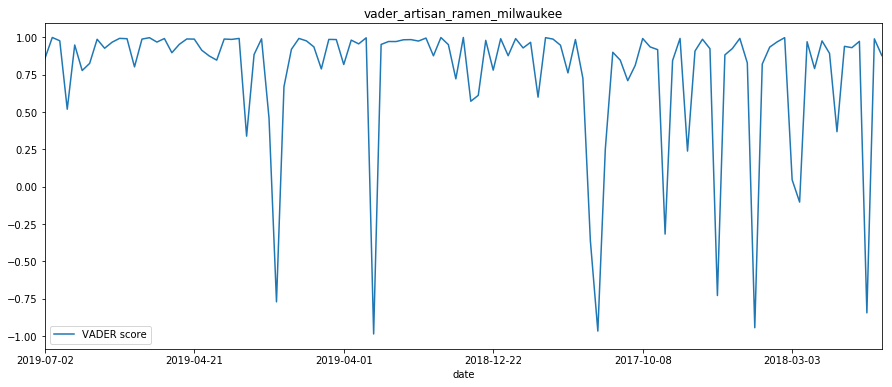

In [23]:
vader_artisan_ramen_milwaukee.plot(figsize=(15, 6)).set_title("vader_artisan_ramen_milwaukee")
plt.show()

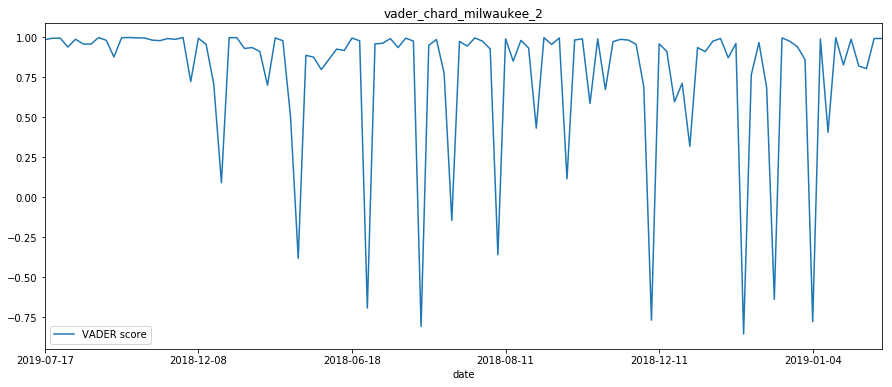

In [24]:
vader_chard_milwaukee_2.plot(figsize=(15, 6)).set_title("vader_chard_milwaukee_2")
plt.show()

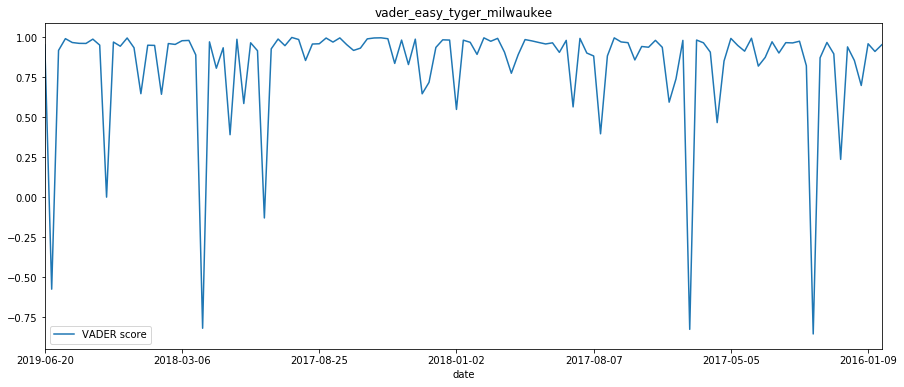

In [25]:
vader_easy_tyger_milwaukee.plot(figsize=(15, 6)).set_title("vader_easy_tyger_milwaukee")
plt.show()

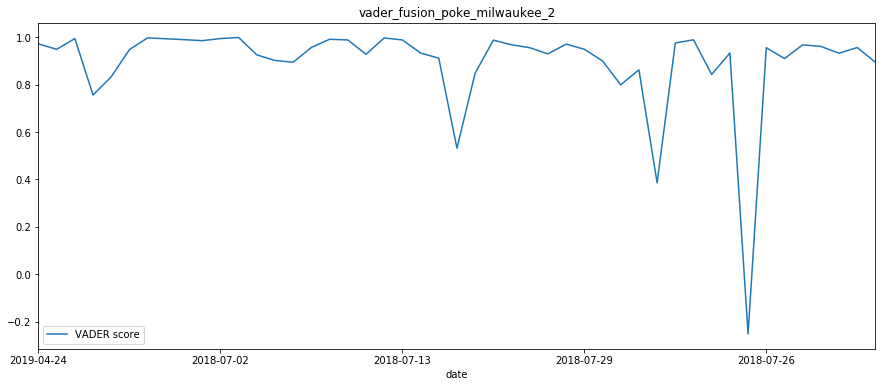

In [26]:
vader_fusion_poke_milwaukee_2.plot(figsize=(15, 6)).set_title("vader_fusion_poke_milwaukee_2")
plt.show()

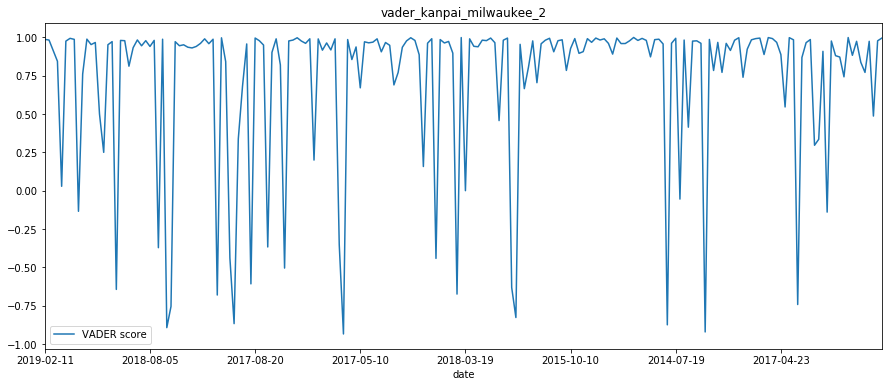

In [27]:
vader_kanpai_milwaukee_2.plot(figsize=(15, 6)).set_title("vader_kanpai_milwaukee_2")
plt.show()

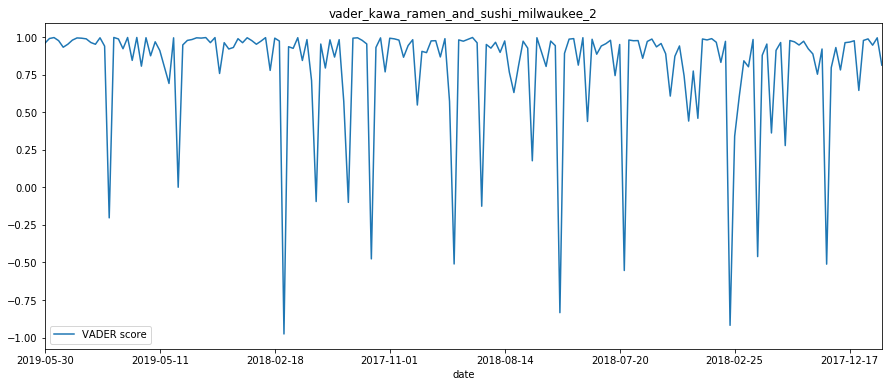

In [28]:
vader_kawa_ramen_and_sushi_milwaukee_2.plot(figsize=(15, 6)).set_title("vader_kawa_ramen_and_sushi_milwaukee_2")
plt.show()

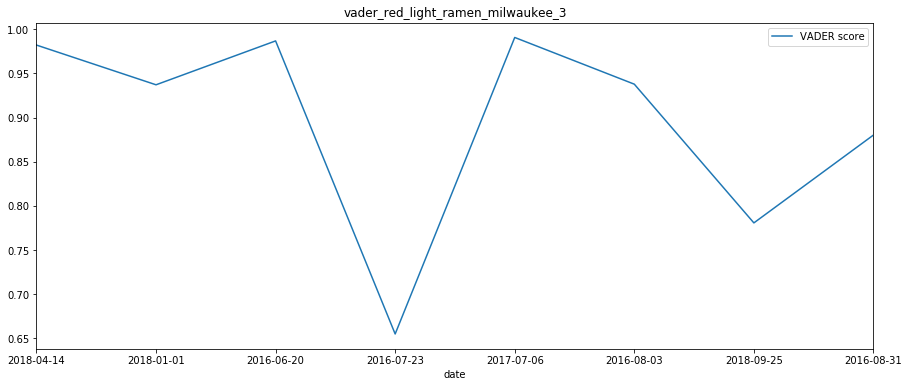

In [29]:
vader_red_light_ramen_milwaukee_3.plot(figsize=(15, 6)).set_title("vader_red_light_ramen_milwaukee_3")
plt.show()

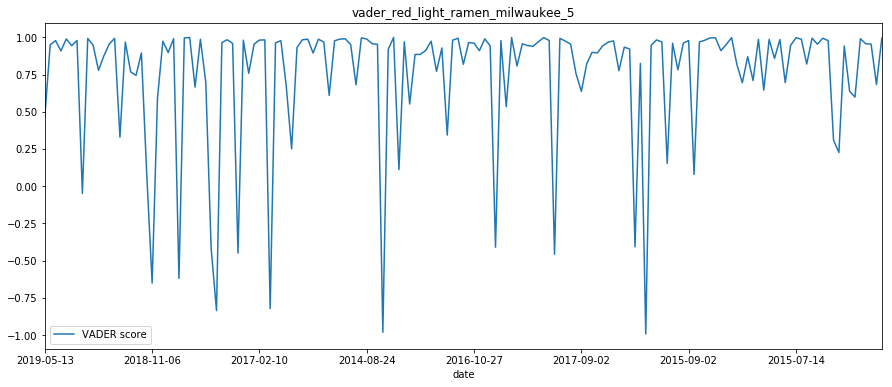

In [30]:
vader_red_light_ramen_milwaukee_5.plot(figsize=(15, 6)).set_title("vader_red_light_ramen_milwaukee_5")
plt.show()

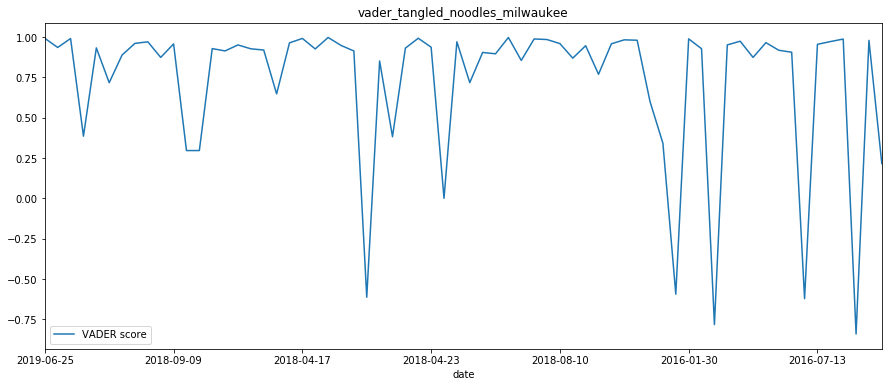

In [31]:
vader_tangled_noodles_milwaukee.plot(figsize=(15, 6)).set_title("vader_tangled_noodles_milwaukee")
plt.show()

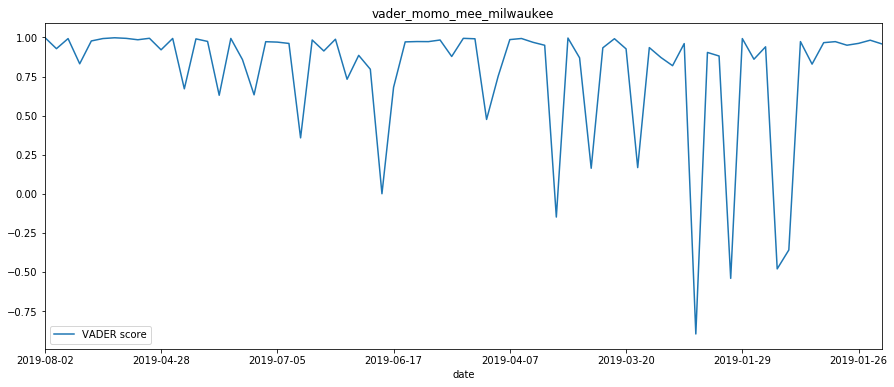

In [32]:
vader_momo_mee_milwaukee.plot(figsize=(15, 6)).set_title("vader_momo_mee_milwaukee")
plt.show()

Text(0.5, 1.0, 'vader_artisan_ramen_milwaukee')

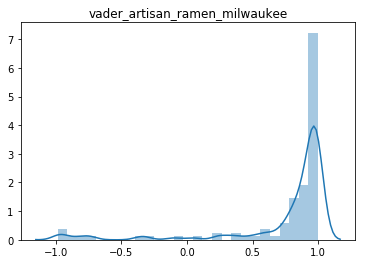

In [33]:
vader_artisan_ramen_milwaukee = vader_artisan_ramen_milwaukee.reset_index()
sns.distplot(vader_artisan_ramen_milwaukee[['VADER score']]).set_title("vader_artisan_ramen_milwaukee")

Text(0.5, 1.0, 'vader_artisan_ramen_milwaukee')

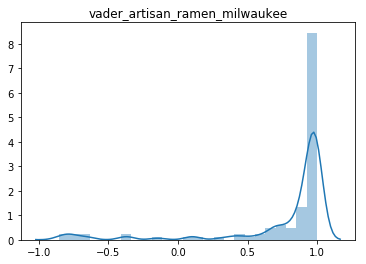

In [34]:
vader_chard_milwaukee_2 = vader_chard_milwaukee_2.reset_index()
sns.distplot(vader_chard_milwaukee_2[['VADER score']]).set_title("vader_artisan_ramen_milwaukee")

Text(0.5, 1.0, 'vader_easy_tyger_milwaukee')

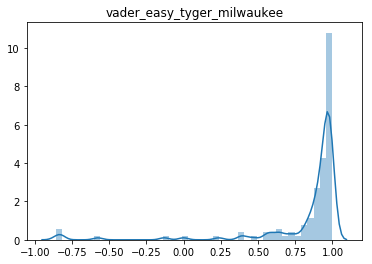

In [35]:
vader_easy_tyger_milwaukee = vader_easy_tyger_milwaukee.reset_index()
sns.distplot(vader_easy_tyger_milwaukee[['VADER score']]).set_title("vader_easy_tyger_milwaukee")

Text(0.5, 1.0, 'vader_fusion_poke_milwaukee_2')

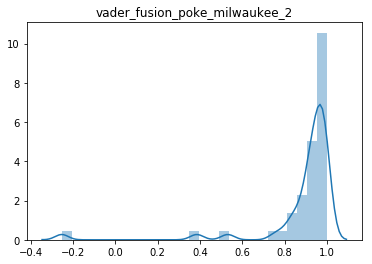

In [36]:
vader_fusion_poke_milwaukee_2 = vader_fusion_poke_milwaukee_2.reset_index()
sns.distplot(vader_fusion_poke_milwaukee_2[['VADER score']]).set_title("vader_fusion_poke_milwaukee_2")

Text(0.5, 1.0, 'vader_kanpai_milwaukee_2')

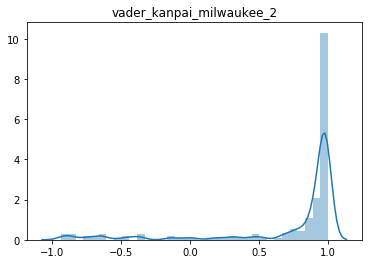

In [37]:
vader_kanpai_milwaukee_2 = vader_kanpai_milwaukee_2.reset_index()
sns.distplot(vader_kanpai_milwaukee_2[['VADER score']]).set_title("vader_kanpai_milwaukee_2")

Text(0.5, 1.0, 'vader_kawa_ramen_and_sushi_milwaukee_2')

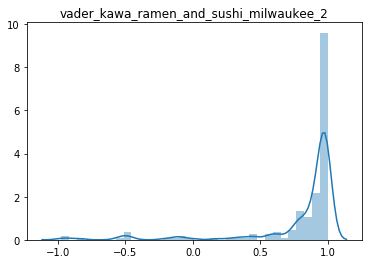

In [38]:
vader_kawa_ramen_and_sushi_milwaukee_2 = vader_kawa_ramen_and_sushi_milwaukee_2.reset_index()
sns.distplot(vader_kawa_ramen_and_sushi_milwaukee_2[['VADER score']]).set_title("vader_kawa_ramen_and_sushi_milwaukee_2")

Text(0.5, 1.0, 'vader_red_light_ramen_milwaukee_3')

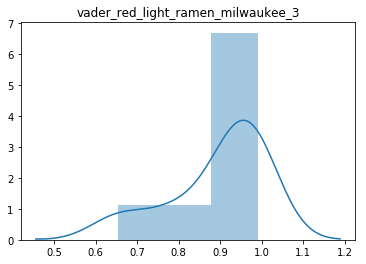

In [39]:
vader_red_light_ramen_milwaukee_3 = vader_red_light_ramen_milwaukee_3.reset_index()
sns.distplot(vader_red_light_ramen_milwaukee_3[['VADER score']]).set_title("vader_red_light_ramen_milwaukee_3")

Text(0.5, 1.0, 'vader_red_light_ramen_milwaukee_5')

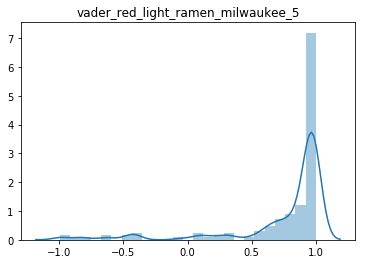

In [40]:
vader_red_light_ramen_milwaukee_5 = vader_red_light_ramen_milwaukee_5.reset_index()
sns.distplot(vader_red_light_ramen_milwaukee_5[['VADER score']]).set_title("vader_red_light_ramen_milwaukee_5")

Text(0.5, 1.0, 'vader_tangled_noodles_milwaukee')

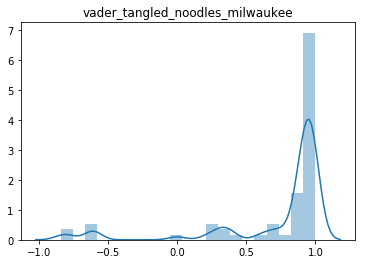

In [41]:
vader_tangled_noodles_milwaukee = vader_tangled_noodles_milwaukee.reset_index()
sns.distplot(vader_tangled_noodles_milwaukee[['VADER score']]).set_title("vader_tangled_noodles_milwaukee")

Text(0.5, 1.0, 'vader_momo_mee_milwaukee')

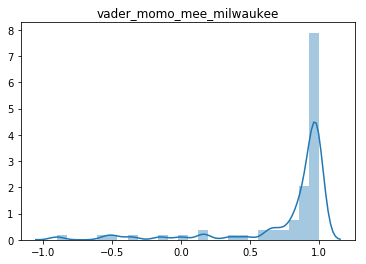

In [42]:
vader_momo_mee_milwaukee = vader_momo_mee_milwaukee.reset_index()
sns.distplot(vader_momo_mee_milwaukee[['VADER score']]).set_title("vader_momo_mee_milwaukee")

/Users/randallgeszvain/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


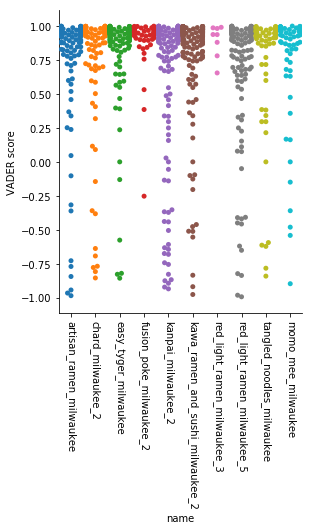

In [43]:
# Factor Plot
g = sns.factorplot(x='name', 
                   y='VADER score', 
                   data=vader, 
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-90)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

In [44]:
VADER_ratings = VADER_avg.reset_index()

In [45]:
VADER_ratings['VADER score'] = round(((VADER_ratings['VADER score']+1)/4)*10,1)

In [46]:
VADER_ratings

,name,VADER score
0,artisan_ramen_milwaukee,4.4
1,chard_milwaukee_2,4.4
2,easy_tyger_milwaukee,4.6
3,fusion_poke_milwaukee_2,4.7
4,kanpai_milwaukee_2,4.3
5,kawa_ramen_and_sushi_milwaukee_2,4.5
6,momo_mee_milwaukee,4.4
7,red_light_ramen_milwaukee_3,4.7
8,red_light_ramen_milwaukee_5,4.4
9,tangled_noodles_milwaukee,4.3


In [58]:
avg_ratings = pd.read_csv("yelp.csv") 
avg_ratings = avg_ratings[['biz','aggregateRating']]
avg_ratings = avg_ratings.rename(columns={"biz": "name"})

In [59]:
avg_ratings

,name,aggregateRating
0,artisan-ramen-milwaukee,4.0
1,red-light-ramen-milwaukee-5,4.0
2,kawa-ramen-and-sushi-milwaukee-2,4.5
3,easy-tyger-milwaukee,4.5
4,tangled-noodles-milwaukee,4.0
5,red-light-ramen-milwaukee-3,4.5
6,chard-milwaukee-2,4.0
7,fusion-poke-milwaukee-2,4.5
8,kanpai-milwaukee-2,4.0
9,momo-mee-milwaukee,4.0


In [60]:
name_map = { "artisan-ramen-milwaukee":"artisan_ramen_milwaukee", 
            "red-light-ramen-milwaukee-5":"red_light_ramen_milwaukee_5", 
            "kawa-ramen-and-sushi-milwaukee-2":"kawa_ramen_and_sushi_milwaukee_2", 
            "red-light-ramen-milwaukee-5":"red_light_ramen_milwaukee_5", 
            "easy-tyger-milwaukee":"easy_tyger_milwaukee", 
            "rtangled-noodles-milwaukee":"tangled_noodles_milwaukee", 
            "red-light-ramen-milwaukee-3":"red_light_ramen_milwaukee_3", 
            "chard-milwaukee-2":"chard_milwaukee_2", 
            "fusion-poke-milwaukee-2":"fusion_poke_milwaukee_2", 
            "kanpai-milwaukee-2":"kanpai_milwaukee_2", 
            "momo-mee-milwaukee":"momo_mee_milwaukee",
            "tangled-noodles-milwaukee":"tangled_noodles_milwaukee"}

In [61]:
avg_ratings['name'] = avg_ratings['name'].map(name_map)

In [62]:
avg_ratings

,name,aggregateRating
0,artisan_ramen_milwaukee,4.0
1,red_light_ramen_milwaukee_5,4.0
2,kawa_ramen_and_sushi_milwaukee_2,4.5
3,easy_tyger_milwaukee,4.5
4,tangled_noodles_milwaukee,4.0
5,red_light_ramen_milwaukee_3,4.5
6,chard_milwaukee_2,4.0
7,fusion_poke_milwaukee_2,4.5
8,kanpai_milwaukee_2,4.0
9,momo_mee_milwaukee,4.0


In [64]:
avg_merge = pd.merge(avg_ratings, VADER_ratings, on='name')

In [65]:
avg_merge

,name,aggregateRating,VADER score
0,artisan_ramen_milwaukee,4.0,4.4
1,red_light_ramen_milwaukee_5,4.0,4.4
2,kawa_ramen_and_sushi_milwaukee_2,4.5,4.5
3,easy_tyger_milwaukee,4.5,4.6
4,tangled_noodles_milwaukee,4.0,4.3
5,red_light_ramen_milwaukee_3,4.5,4.7
6,chard_milwaukee_2,4.0,4.4
7,fusion_poke_milwaukee_2,4.5,4.7
8,kanpai_milwaukee_2,4.0,4.3
9,momo_mee_milwaukee,4.0,4.4


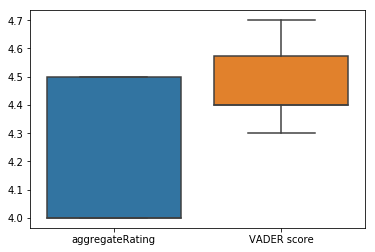

In [66]:
sns.boxplot(data=avg_merge)

In [68]:
avg_merge_T = avg_merge.T

In [71]:
avg_merge_T.columns = avg_merge_T.iloc[0]
avg_merge_T = avg_merge_T.drop(avg_merge_T.index[0])

In [77]:
avg_merge_T

name,artisan_ramen_milwaukee,red_light_ramen_milwaukee_5,kawa_ramen_and_sushi_milwaukee_2,easy_tyger_milwaukee,tangled_noodles_milwaukee,red_light_ramen_milwaukee_3,chard_milwaukee_2,fusion_poke_milwaukee_2,kanpai_milwaukee_2,momo_mee_milwaukee
aggregateRating,4,4,4.5,4.5,4,4.5,4,4.5,4,4
VADER score,4.4,4.4,4.5,4.6,4.3,4.7,4.4,4.7,4.3,4.4


In [93]:
vader_group = sentences[['name','VADER score']]
vader_group.head()

,name,VADER score
0,artisan_ramen_milwaukee,0.8562
1,artisan_ramen_milwaukee,0.9986
2,artisan_ramen_milwaukee,0.9766
3,artisan_ramen_milwaukee,0.5187
4,artisan_ramen_milwaukee,0.9483


In [95]:
vader_artisan_ramen_milwaukee = vader_artisan_ramen_milwaukee[['VADER score']]
vader_chard_milwaukee_2 = vader_chard_milwaukee_2[['VADER score']]
vader_easy_tyger_milwaukee = vader_easy_tyger_milwaukee[['VADER score']]
vader_fusion_poke_milwaukee_2 = vader_fusion_poke_milwaukee_2[['VADER score']]
vader_kanpai_milwaukee_2 = vader_kanpai_milwaukee_2[['VADER score']]
vader_kawa_ramen_and_sushi_milwaukee_2 = vader_kawa_ramen_and_sushi_milwaukee_2[['VADER score']]
vader_red_light_ramen_milwaukee_3 = vader_red_light_ramen_milwaukee_3[['VADER score']]
vader_red_light_ramen_milwaukee_5 = vader_red_light_ramen_milwaukee_5[['VADER score']]
vader_tangled_noodles_milwaukee = vader_tangled_noodles_milwaukee[['VADER score']]
vader_momo_mee_milwaukee = vader_momo_mee_milwaukee[['VADER score']]

In [97]:
vader_artisan_ramen_milwaukee = vader_artisan_ramen_milwaukee.rename(columns={"VADER score": "vader_artisan_ramen_milwaukee"})
vader_chard_milwaukee_2 = vader_chard_milwaukee_2.rename(columns={"VADER score": "vader_chard_milwaukee_2"})
vader_easy_tyger_milwaukee = vader_easy_tyger_milwaukee.rename(columns={"VADER score": "vader_easy_tyger_milwaukee"})
vader_fusion_poke_milwaukee_2 = vader_fusion_poke_milwaukee_2.rename(columns={"VADER score": "vader_fusion_poke_milwaukee_2"})
vader_kanpai_milwaukee_2 = vader_kanpai_milwaukee_2.rename(columns={"VADER score": "vader_kanpai_milwaukee_2"})
vader_kawa_ramen_and_sushi_milwaukee_2 = vader_kawa_ramen_and_sushi_milwaukee_2.rename(columns={"VADER score": "vader_kawa_ramen_and_sushi_milwaukee_2"})
vader_red_light_ramen_milwaukee_3 = vader_red_light_ramen_milwaukee_3.rename(columns={"VADER score": "vader_red_light_ramen_milwaukee_3"})
vader_red_light_ramen_milwaukee_5 = vader_red_light_ramen_milwaukee_5.rename(columns={"VADER score": "vader_red_light_ramen_milwaukee_5"})
vader_tangled_noodles_milwaukee = vader_tangled_noodles_milwaukee.rename(columns={"VADER score": "vader_tangled_noodles_milwaukee"})
vader_momo_mee_milwaukee = vader_momo_mee_milwaukee.rename(columns={"VADER score": "vader_momo_mee_milwaukee"})

In [103]:
VADER = pd.concat([vader_artisan_ramen_milwaukee, vader_chard_milwaukee_2,  vader_easy_tyger_milwaukee,  vader_fusion_poke_milwaukee_2, vader_kanpai_milwaukee_2, vader_kawa_ramen_and_sushi_milwaukee_2, vader_red_light_ramen_milwaukee_3,vader_red_light_ramen_milwaukee_5,vader_tangled_noodles_milwaukee,vader_momo_mee_milwaukee], axis=1, ignore_index=False)

In [106]:
VADER = round(((VADER+1)/4)*10,1)

[Text(0, 0, 'vader_artisan_ramen_milwaukee'),
 Text(0, 0, 'vader_chard_milwaukee_2'),
 Text(0, 0, 'vader_easy_tyger_milwaukee'),
 Text(0, 0, 'vader_fusion_poke_milwaukee_2'),
 Text(0, 0, 'vader_kanpai_milwaukee_2'),
 Text(0, 0, 'vader_kawa_ramen_and_sushi_milwaukee_2'),
 Text(0, 0, 'vader_red_light_ramen_milwaukee_3'),
 Text(0, 0, 'vader_red_light_ramen_milwaukee_5'),
 Text(0, 0, 'vader_tangled_noodles_milwaukee'),
 Text(0, 0, 'vader_momo_mee_milwaukee')]

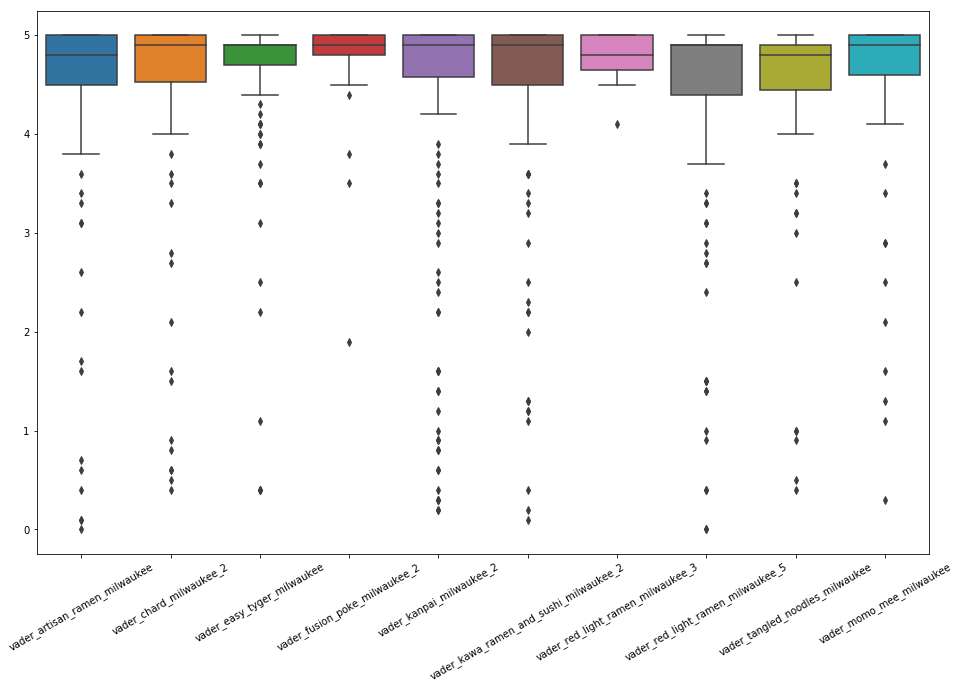

In [107]:
plt.figure(figsize=(16, 10))
ax = sns.boxplot(data=VADER)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)